# Testing Chemistry for molecule environment

TODO:

    - clean data set of invalid smile objects
    
    

In [1]:
# imports crucial to molecule object
import pandas as pd
import os
from rdkit import Chem, DataStructs
import random
from Chemistry import Mol
from rdkit.Chem import Draw
# imports for testing

In [2]:
df = pd.read_csv('MoleculeLibrary.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'SMILES', 'Compound ID'], dtype='object')

In [4]:
os.path.isfile('./MoleculeLibrary.csv')

True

In [5]:
df[56:113]

,Unnamed: 0,SMILES,Compound ID
56,56,CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,17a-Methyltestosterone
57,57,Nc2cccc3nc1ccccc1cc23,1-aminoacridine
58,58,CC(C)CBr,1-Bromo-2-methylpropane
59,59,CCCCBr,1-Bromobutane
60,60,CCCCCCCBr,1-Bromoheptane
61,61,CCCCCCBr,1-Bromohexane
62,62,Brc1cccc2ccccc12,1-Bromonapthalene
63,63,CCCCCCCCBr,1-Bromooctane
64,64,CCCCCBr,1-Bromopentane
65,65,CCCBr,1-Bromopropane


## possible bonding 
    =C
    -C
    [C]
    (C)
    

###  Useful methods 

 m.GetAtomWithIdx(0).GetSymbol()
    'C'
    
 m.GetAtomWithIdx(0).GetExplicitValence()
    2
    
 m.GetBondWithIdx(0).GetBeginAtomIdx()
    0
    
 m.GetBondWithIdx(0).GetEndAtomIdx()
    1
    
 m.GetBondBetweenAtoms(0,1).GetBondType()
rdkit.Chem.rdchem.BondType.SINGLE

## Molecule Class

## Comparing molecules to others


Notes:
    - we should use the comparision for the history as well as to the goal.
    - There must be a limit of history restores before it reverts twice
    - bad actions must somehow be penalized
    - use while loops to test
    - explore adding bonds 
    - explore processing the goal
    
    
    
Exploring functional groups
    - (c1ccccc1)
        
        
Examples
    -Brc1ccc(Br)cc1
    

In [6]:
# Set mol
moltest = Mol('CC2Cc1ccccc1N2NC(=O)c3ccc(Cl)c(c3)S(N)(=O)=O', 'C#C' )

In [7]:
# get Random Goal and initial molecule
mol = moltest.GetRandomGoal()
print(mol)

659    Ethyl nonanoate
Name: Compound ID, dtype: object


In [8]:
print("New goal:         " + moltest.goal + "\n" + "New initial Mol:  " + moltest.mol)

New goal:         CCCCCCCCC(=O)OCC
New initial Mol:  C


In [16]:
moltest.RAM


[['C', '[O]', '[O]'], ['C', '[O]', '[O]'], ['C', '[O]', '[O]']]

In [14]:
# display current atom options 
atoms = moltest.get_Atoms()
print(atoms)
bonds = moltest.get_Bonds()
print(bonds)

['C', 'O']
[1.0, 2.0]


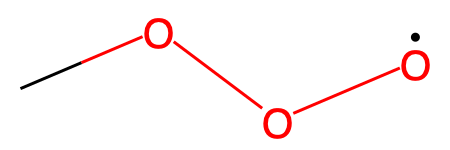

In [17]:
moltest.AddA("[O]", True)
moltest.CheckValidity()
moltest.GetMol()

In [18]:

print("Molecule is {} % similar to the desired state".format( moltest.GetSimilarity()))
moltest.GetMol()
moltest.history()

Molecule is 2.0 % similar to the desired state


[['C', '[O]', '[O]', '[O]'],
 ['C', '[O]', '[O]', '[O]'],
 ['C', '[O]', '[O]', '[O]']]

Molecule at state S-1: 
C
Molecule at state S: 
C
Molecule is 0.4695 % similar to the desired state


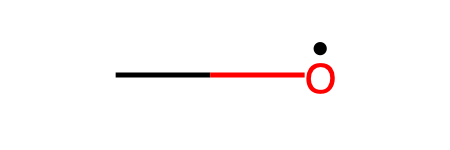

In [12]:
# Add correct atom to mol
#moltest.AddA('C')
#moltest.AddA(random.choice(atoms), True)


# Print history
moltest.DisplayChanges()

# print delta from goal
print("Molecule is {} % similar to the desired state".format( moltest.GetSimilarity()))

# show mol
moltest.GetMol()



In [33]:
bondedatom = "(" + random.choice(atoms) + ")"
moltest.AddA(bondedatom, True)
moltest.GetMol()

RDKit ERROR: [11:48:16] Explicit valence for atom # 1 O, 5, is greater than permitted


In [32]:
bondedatom2 = "=" + random.choice(atoms)
moltest.AddA(bondedatom, True)
moltest.GetMol()

RDKit ERROR: [11:48:12] Explicit valence for atom # 1 O, 4, is greater than permitted


['C', 'C', 'C']
0.0%


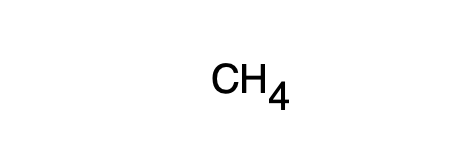

In [17]:
moltest.revertMol()
print(moltest.history())
print(str(moltest.GetSimilarity()) + "%")
moltest.GetMol()

In [24]:
moltest.AddA('e', True) # will be invalid

In [30]:
moltest.CheckValidity()

RDKit ERROR: [14:53:12] Explicit valence for atom # 11 Cl, 2, is greater than permitted


False

###  ML TESTING
    - create array of len possible mols
    - take the option that creates the largest delta
    

In [7]:
elements = Chem.GetPeriodicTable()
def GetValency(element):
    return list(elements.GetValenceList(element))[0]

In [15]:
GetValency("S")

2

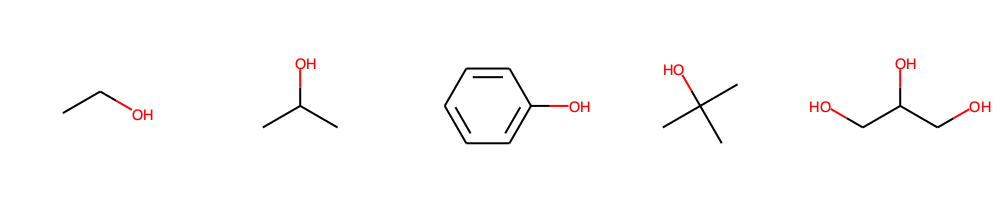

In [49]:
ethanol = Chem.MolFromSmiles('CCO')
isopropanol = Chem.MolFromSmiles('CC(C)O')
phenol = Chem.MolFromSmiles('c1cccc(O)c1')
t_butanol = Chem.MolFromSmiles('C(C)(C)(C)O')
glycerol = Chem.MolFromSmiles('OCC(O)CO')

alcohols = [ethanol, isopropanol, phenol, t_butanol, glycerol]

Draw.MolsToGridImage(alcohols, molsPerRow=5)
